In [2]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
#########
from sklearn.model_selection import train_test_split 

import pandas as pd
import numpy as np
import tensorflow as tf

In [4]:
# seed 값 설정
seed=0
np.random.seed(seed)
tf.random.set_seed(3)

# 데이터 불러오기 
#########
df = pd.read_csv('../content/drive/MyDrive/모두의 딥러닝/deeplearning/dataset/sonar.csv',header=None)

dataset = df.values
x = dataset[:,0:60]
y_obj = dataset[:,60]
x= np.array(x).astype(np.float32)# x를 실수 넘파이로 변환 안해주면 에러가 남 이유는 모르겠음


# 문자열 숫자 인코딩
e =LabelEncoder()
e.fit(y_obj)
y = e.transform(y_obj)

# 학습셋 테스트셋 구분 
# random_state : 나눌 데이터를 랜덤하게 뽑는지 , 정수면 데이터는 seed
#####
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=seed)


# 모델 설계
model = Sequential()
model.add(Dense(24,input_dim=60,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

# 모델 컴파일
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
# 여기선 평균제곱 오차를 사용했네

# 모델 학습
# 학습셋으로 학습
# np.array(x_train).astype(np.float32)# x를 실수 넘파이로 변환 안해주면 에러가 남 이유는 모르겠음
########
model.fit(x_train,y_train,epochs=130,batch_size=5,validation_split=0.25)


# 테스트셋에 모델 적용
#np.array(x_test).astype(np.float32)# x를 실수 넘파이로 변환 안해주면 에러가 남 이유는 모르겠음
########
print(model.evaluate(x_test,y_test)) # evaluate 의 결과값 [손실,정확도]

Epoch 1/130
25/25 [==============================] - 1s 17ms/step - loss: 0.2522 - accuracy: 0.4883 - val_loss: 0.2406 - val_accuracy: 0.5952
Epoch 2/130
25/25 [==============================] - 0s 3ms/step - loss: 0.2394 - accuracy: 0.6270 - val_loss: 0.2327 - val_accuracy: 0.5714
Epoch 3/130
25/25 [==============================] - 0s 2ms/step - loss: 0.2251 - accuracy: 0.6168 - val_loss: 0.2253 - val_accuracy: 0.6667
Epoch 4/130
25/25 [==============================] - 0s 3ms/step - loss: 0.2175 - accuracy: 0.6408 - val_loss: 0.2168 - val_accuracy: 0.6905
Epoch 5/130
25/25 [==============================] - 0s 2ms/step - loss: 0.1980 - accuracy: 0.6995 - val_loss: 0.2073 - val_accuracy: 0.7143
Epoch 6/130
25/25 [==============================] - 0s 2ms/step - loss: 0.1874 - accuracy: 0.7839 - val_loss: 0.1999 - val_accuracy: 0.6905
Epoch 7/130
25/25 [==============================] - 0s 3ms/step - loss: 0.2014 - accuracy: 0.6652 - val_loss: 0.1932 - val_accuracy: 0.6905
Epoch 8/130


# 검증셋 이용

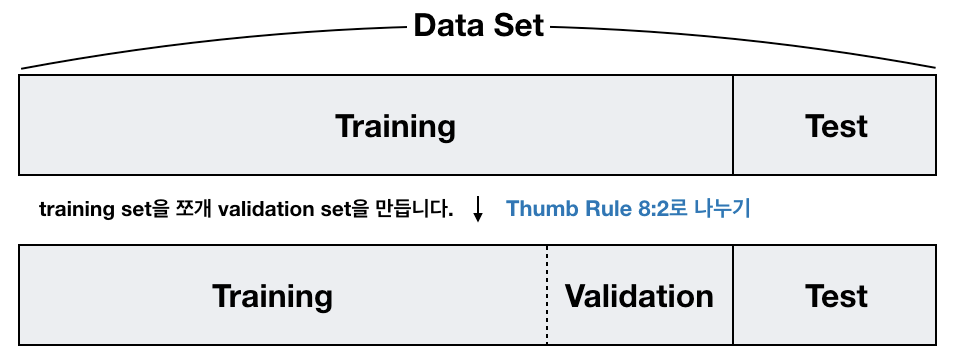

# 모델 저장과 재사용

In [5]:
# 함수 불러오기
from keras.models import load_model

In [6]:
model.save('my_model.h5')

In [7]:
del model

In [8]:
model = load_model('my_model.h5')